In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../../data/sentiment_analysis_predictions/by_day/GME.csv", parse_dates=["created_at"])
df.set_index("created_at", drop=True, inplace=True)

In [3]:
data = yf.download("GME", start="2021-05-02", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,177.490005,177.490005,159.610001,162.199997,162.199997,5261000
2021-05-04,159.000000,161.490005,151.800003,160.729996,160.729996,4007500
2021-05-05,161.830002,165.500000,158.330002,159.479996,159.479996,2805400
2021-05-06,160.860001,164.720001,155.600006,161.009995,161.009995,2942800
2021-05-07,160.110001,167.410004,157.500000,161.110001,161.110001,2934600
...,...,...,...,...,...,...
2022-04-25,135.410004,139.710007,133.279999,135.949997,135.949997,1534800
2022-04-26,135.639999,136.800003,126.160004,127.599998,127.599998,1545700
2022-04-27,127.269997,132.679993,124.580002,129.839996,129.839996,1305900


In [5]:
df_merged = pd.merge(df,data, how='inner', left_index=True, right_index=True)

In [6]:
#df_merged["prev_adj_close"] = df_merged["Adj Close"].shift(1)

## 3. Calculating Returns

In [7]:
# Return in percent
df_merged["return"] = df_merged["Adj Close"].pct_change()

In [8]:
df_merged["log_return"] = np.log(df_merged["Adj Close"]) - np.log(df_merged["Adj Close"].shift(1))

In [9]:
df_merged["log_return_shift"] = df_merged["log_return"].shift(-1)

In [10]:
df_merged["pos_minus_neg_diff"] = df_merged["pos_minus_neg"].diff(1)

In [11]:
df_merged.dropna(inplace=True)

In [12]:
df_merged

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Open,High,Low,Close,Adj Close,Volume,return,log_return,log_return_shift,pos_minus_neg_diff
2021-05-04,0.271763,0.360857,0.367380,499,0.095617,47.712727,159.000000,161.490005,151.800003,160.729996,160.729996,4007500,-0.009063,-0.009104,-0.007807,-0.068648
2021-05-05,0.229515,0.447798,0.322687,820,0.093173,76.401538,161.830002,165.500000,158.330002,159.479996,159.479996,2805400,-0.007777,-0.007807,0.009548,-0.002444
2021-05-06,0.201018,0.429720,0.369262,1647,0.168243,277.096813,160.860001,164.720001,155.600006,161.009995,161.009995,2942800,0.009594,0.009548,0.000621,0.075071
2021-05-07,0.200771,0.395441,0.403788,734,0.203017,149.014766,160.110001,167.410004,157.500000,161.110001,161.110001,2934600,0.000621,0.000621,-0.117705,0.034774
2021-05-10,0.290007,0.379028,0.330965,756,0.040958,30.964170,161.309998,161.589996,143.000000,143.220001,143.220001,4806700,-0.111042,-0.117705,0.025506,-0.162059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,0.259425,0.387646,0.352929,166,0.093503,15.521564,142.550003,146.300003,135.550003,138.220001,138.220001,1569600,-0.023594,-0.023877,-0.016559,0.026664
2022-04-25,0.251789,0.407347,0.340865,226,0.089076,20.131230,135.410004,139.710007,133.279999,135.949997,135.949997,1534800,-0.016423,-0.016559,-0.063387,-0.004427
2022-04-26,0.341325,0.328281,0.330394,198,-0.010931,-2.164416,135.639999,136.800003,126.160004,127.599998,127.599998,1545700,-0.061420,-0.063387,0.017403,-0.100008
2022-04-27,0.228449,0.414548,0.357003,245,0.128553,31.495606,127.269997,132.679993,124.580002,129.839996,129.839996,1305900,0.017555,0.017403,-0.004090,0.139485


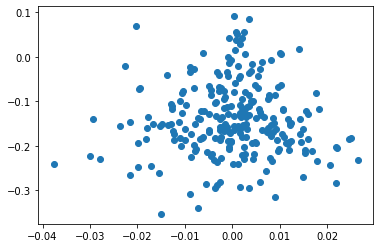

In [74]:
plt.scatter(df_merged["log_return_shift"], df_merged["pos_minus_neg"])
plt.show()

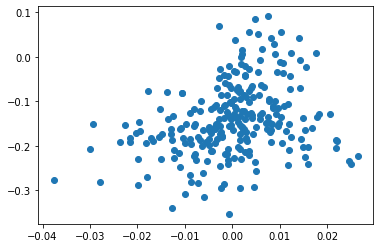

In [75]:
plt.scatter(df_merged["log_return"], df_merged["pos_minus_neg"])
plt.show()

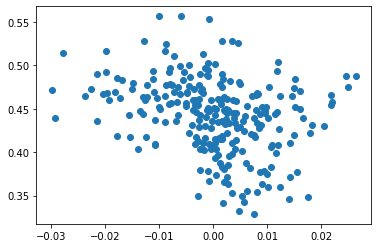

In [92]:
plt.scatter(df_merged["log_return"], df_merged["Negative"])
plt.show()

In [13]:
print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["count"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["count"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_times_count"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_times_count"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["Positive"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["Positive"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["Negative"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["Negative"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_diff"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_diff"]))

(0.39198870063018076, 1.311536864270928e-10)
(0.012204886056458452, 0.8477294871291776)
(0.19055733563681146, 0.0024809987787629767)
(-0.05147274681141, 0.41775960042807253)
(0.334466724103638, 6.00193666897092e-08)
(-0.07033941624820689, 0.2678777718829121)
(0.37148607956461827, 1.339264839545175e-09)
(0.04780273513419048, 0.4517684402359975)
(-0.3377653254126125, 4.361834846825744e-08)
(0.036517028537754716, 0.5655056737355818)
(0.4018638515979211, 4.0395283499853265e-11)
(0.08540104949706363, 0.17830177548194934)


<AxesSubplot:>

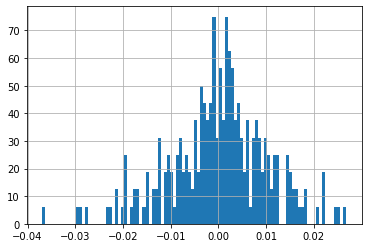

In [63]:
df_merged["return"].hist(bins=100, density=True)

## 4. Descriptive and inferential statistics

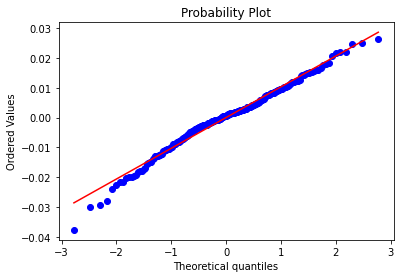

In [67]:
stats.probplot(df_merged["log_return"].dropna(), dist="norm", plot=plt)
plt.show()

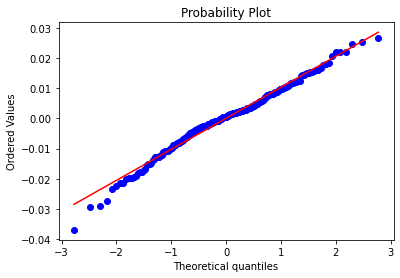

In [68]:
stats.probplot(df_merged["return"].dropna(), dist="norm", plot=plt)
plt.show()

In [60]:
np.e**1.38629

3.999982555558476

<AxesSubplot:>

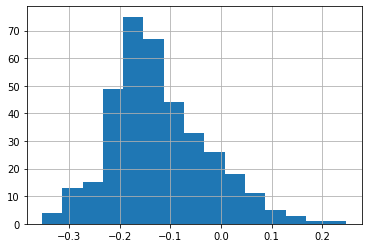

In [12]:
df["pos_minus_neg"].hist(bins=15, )